## Crime Prediction

Dataset - https://data.baltimorecity.gov/Public-Safety/BPD-Part-1-Victim-Based-Crime-Data/wsfq-mvij

In [1]:
%matplotlib inline
import pandas as pd

import numpy as np
import matplotlib as plt

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis

from sklearn import linear_model, model_selection, preprocessing, metrics, datasets
from sklearn.multiclass import OneVsRestClassifier
import statsmodels.api as sm

from sklearn.model_selection import cross_val_score

/home/payal/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
# The dataset
pc=pd.read_csv("BPD_Victim.csv")
pc.sample(50).head(10)

,CrimeDate,CrimeTime,CrimeCode,Location,Description,Inside/Outside,Weapon,Post,District,Neighborhood,Longitude,Latitude,Location 1,Premise,Total Incidents
122670,06/27/2015,00:36:00,4B,3900 FERNDALE AVE,AGG. ASSAULT,I,KNIFE,622.0,NORTHWESTERN,Howard Park,-76.69680,39.33846,"(39.3384600000, -76.6968000000)",ROW/TOWNHO,1
77062,06/05/2016,16:00:00,6D,2000 E FAYETTE ST,LARCENY FROM AUTO,O,NaN,212.0,EASTERN,Butcher's Hill,-76.58820,39.29413,"(39.2941300000, -76.5882000000)",PARKING LO,1
3025,11/08/2017,19:30:00,3B,1700 INGRAM RD,ROBBERY - STREET,O,NaN,415.0,NORTHEASTERN,Perring Loch,-76.58376,39.35114,"(39.3511400000, -76.5837600000)",ALLEY,1
56897,10/23/2016,23:00:00,7A,1600 CLIFTON AVE,AUTO THEFT,O,NaN,733.0,WESTERN,Penn North,-76.64573,39.31228,"(39.3122800000, -76.6457300000)",STREET,1
38716,03/02/2017,09:30:00,6C,0 S PACA ST,LARCENY,NaN,NaN,121.0,CENTRAL,University Of Maryland,-76.62225,39.28833,"(39.2883300000, -76.6222500000)",NaN,1
191572,12/25/2013,02:00:00,5D,4200 SHANNON DR,BURGLARY,O,NaN,433.0,NORTHEASTERN,Orchard Ridge,-76.55541,39.31673,"(39.3167300000, -76.5554100000)",MINI STORA,1
197866,11/07/2013,20:40:00,6C,2400 FREDERICK AV,LARCENY,I,NaN,841.0,SOUTHWESTERN,Millhill,-76.65583,39.28342,"(39.2834200000, -76.6558300000)",OTHER - IN,1
220518,06/05/2013,12:00:00,5A,400 HAZLETT AV,BURGLARY,I,NaN,833.0,SOUTHWESTERN,Beechfield,-76.69812,39.27836,"(39.2783600000, -76.6981200000)",SINGLE HOU,1
133498,04/15/2015,12:00:00,6E,5400 PARK HEIGHTS AVE,LARCENY,I,NaN,633.0,NORTHWESTERN,Arlington,-76.68143,39.35061,"(39.3506100000, -76.6814300000)",OTHER - IN,1
266587,06/22/2012,22:45:00,4B,5200 FRANKFORD AV,AGG. ASSAULT,I,KNIFE,443.0,NORTHEASTERN,Frankford,-76.54112,39.32628,"(39.3262800000, -76.5411200000)",APT/CONDO,1


In [3]:
pc.columns

Index(['CrimeDate', 'CrimeTime', 'CrimeCode', 'Location', 'Description',
       'Inside/Outside', 'Weapon', 'Post', 'District', 'Neighborhood',
       'Longitude', 'Latitude', 'Location 1', 'Premise', 'Total Incidents'],
      dtype='object')

In [4]:
pc.Description.unique()

array(['COMMON ASSAULT', 'LARCENY', 'ROBBERY - STREET', 'AGG. ASSAULT',
       'LARCENY FROM AUTO', 'HOMICIDE', 'BURGLARY', 'AUTO THEFT',
       'ROBBERY - RESIDENCE', 'ROBBERY - COMMERCIAL',
       'ROBBERY - CARJACKING', 'ASSAULT BY THREAT', 'SHOOTING', 'RAPE',
       'ARSON'], dtype=object)

In [5]:
#Get only outside crimes

pc = pc.loc[pc['Inside/Outside'] == 'O']

In [6]:
time_desc = pc[['CrimeDate', 'CrimeTime', 'Description']]
time_desc.columns
time_desc['CrimeTime'] = time_desc['CrimeDate'].map(str) + ' ' + time_desc['CrimeTime']
del time_desc['CrimeDate']
time_desc.head()

/home/payal/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,CrimeTime,Description
3,12/02/2017 21:29:00,ROBBERY - STREET
7,12/02/2017 21:10:00,COMMON ASSAULT
8,12/02/2017 21:09:00,AGG. ASSAULT
11,12/02/2017 20:30:00,ROBBERY - STREET
15,12/02/2017 20:00:00,ROBBERY - STREET


In [7]:
time_desc['CrimeTime'] = pd.to_datetime(time_desc['CrimeTime'])

/home/payal/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [8]:
time_desc.columns

Index(['CrimeTime', 'Description'], dtype='object')

In [9]:
time_desc.dtypes

CrimeTime      datetime64[ns]
Description            object
dtype: object

In [10]:
time_desc['hour'] = time_desc.CrimeTime.apply(lambda x : x.hour)

/home/payal/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [11]:
time_desc['year'] = time_desc.CrimeTime.apply(lambda x : x.year)

/home/payal/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [12]:
time_desc.head()

,CrimeTime,Description,hour,year
3,2017-12-02 21:29:00,ROBBERY - STREET,21,2017
7,2017-12-02 21:10:00,COMMON ASSAULT,21,2017
8,2017-12-02 21:09:00,AGG. ASSAULT,21,2017
11,2017-12-02 20:30:00,ROBBERY - STREET,20,2017
15,2017-12-02 20:00:00,ROBBERY - STREET,20,2017


In [45]:
# number of crimes per year color coded by crime type - line graph - one line per crime type

by_year = time_desc.groupby(['year', 'Description']).count().reset_index()
by_year['count'] = by_year['CrimeTime']
del by_year['CrimeTime']
del by_year['hour']
by_year.head()

,year,Description,count
0,2012,AGG. ASSAULT,2270
1,2012,ARSON,114
2,2012,ASSAULT BY THREAT,131
3,2012,AUTO THEFT,3563
4,2012,BURGLARY,352


In [62]:
by_year.dtypes

year            int64
Description    object
count           int64
dtype: object

In [74]:
crime_type = time_desc['Description'].unique().tolist()


In [48]:
import plotly.graph_objs as bp
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
#import plotly.offline as po
init_notebook_mode(connected=True)

In [108]:
import sklearn.preprocessing as sk

le = sk.LabelEncoder()

by_year['Description'] = le.fit_transform(by_year['Description'])
#list(le.inverse_transform(by_year['Description']))

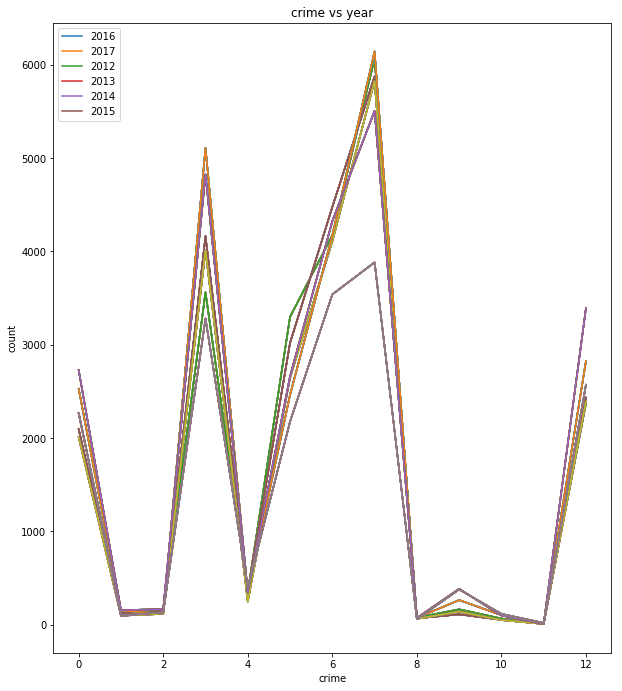

In [111]:
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure(figsize=(10,10))

year = by_year['year'].tolist()
crime_type = time_desc['Description'].unique().tolist()

ax = fig.add_subplot(111)
fig.subplots_adjust(top=1)
ax.set_title('crime vs year')
ax.set_xlabel('crime')
ax.set_ylabel('count')


for i in year:
    x = by_year.loc[by_year['year'] == i]['Description'].tolist()
    y = by_year.loc[by_year['year'] == i]['count'].tolist()
    plt.plot(x, y)

print()
plt.legend(set(year), loc='upper left')
plt.show()

AttributeError: 'str' object has no attribute 'set_color'

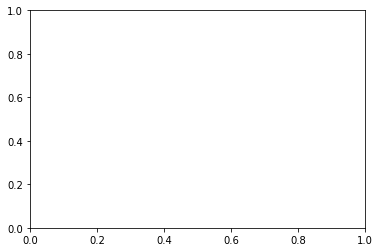

In [67]:
import matplotlib.pyplot as plt
import numpy as np

fig1 = plt.figure()
ax1 = fig1.add_subplot(111)

crime_type = time_desc['Description'].unique().tolist()

colormap = plt.cm.gist_ncar #nipy_spectral, Set1,Paired   
colors = [colormap(i) for i in np.linspace(0, 1,len(crime_type))]
for i,j in enumerate(crime_type):
    j.set_color(colors[i])


ax1.legend(loc=2)

#year = by_year['year'].unique().tolist()
#by_year['count'].where(by_year['year'] == 2012)
for i in year:
    ax1.plot(by_year['count'],label=crime_type)

In [ ]:
#print(crime.head())
notice.sort_values('NoticeDate', inplace=True)

#print(str(notice.dtypes))
#print(notice.head())

y = crime.groupby(['CrimeDate']).CrimeDate.count()
dat = []
for x in range(len(y)):
    dat.append(y[x])

#notice.sort_values('NoticeDate', inplace=True, ascending=False)
xx = notice.groupby(['NoticeDate']).NoticeDate.count()
dut = []

#print(notice.head())
for xxx in range(len(xx)):
    dut.append(xx[xxx])

#print(len(dat))
dutta = []
bhatta = []
for crimdat in crime.CrimeDate.unique():
    dutta.append(crimdat)
for bhat in notice.NoticeDate.unique():
    bhatta.append(bhat)
    
#print(len(dutta),len(bhatta))
#print(notice.NoticeDate.unique())

bat = []
   
for nu in range(len(dut)):
    if (nu == 0):
        bat.append(dut[nu])
    else:
        bat.append(dut[nu] + bat[nu - 1])
        
#print(dut)

fig = {
        'data': [
  		{
  			'x': dutta, 
        	'y': dat*1000,
#        	'text': str(crime.CrimeDate), 
        	'mode': 'markers', 
        	'name': 'Crimes'},

        {
        	'x': bhatta, 
        	'y': bat, 
#        	'text': str(notice.NoticeDate), 
        	'mode': 'markers', 
        	'name': 'Notices'}

    ],
    'layout': {
        'xaxis': {'title': 'crimedate and noticedate', 'autorange': 'reversed', 'type': 'date'},
        'yaxis': {'title': "number of crimes"}
    }
}
iplot(fig)